> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

>检查发现表格共有110527行，14列。没有NULL data。

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()
#检查发现没有null data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.groupby('Neighbourhood')['AppointmentID'].count()

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
BELA VISTA             1907
BENTO FERREIRA          858
BOA VISTA               312
BONFIM                 2773
CARATOÍRA              2565
CENTRO                 3334
COMDUSA                 310
CONQUISTA               849
CONSOLAÇÃO             1376
CRUZAMENTO             1398
DA PENHA               2217
DE LOURDES              305
DO CABRAL               560
DO MOSCOSO              413
DO QUADRO               849
ENSEADA DO SUÁ          235
ESTRELINHA              538
FONTE GRANDE            682
FORTE SÃO JOÃO         1889
FRADINHOS               258
GOIABEIRAS              700
GRANDE VITÓRIA         1071
GURIGICA               2018
HORTO                   175
ILHA DAS CAIEIRAS      1071
                       ... 
PARQUE INDUSTRIAL         1
PARQUE MOSCOSO          802
PIEDADE                 452
PONTAL DE CAMBURI        69
PRAIA 

In [5]:
#共有多少patient
df.PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

In [6]:
#日期格式确定
print(type(df.ScheduledDay[0]))
print(type(df.AppointmentDay[0]))

<class 'str'>
<class 'str'>


In [7]:
#转换成时间格式
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#noshow的人数
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [95]:
# 重命名拼写错误的列
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#性别和noshow的数量统计
gender_noshow_counts=df.groupby(['Gender','NoShow']).count()['PatientId']

In [13]:
#各性别人群的总数
gender_counts=df.groupby(['Gender']).count()['PatientId']
gender_counts

Gender
F    71840
M    38687
Name: PatientId, dtype: int64

In [14]:
# 获取男女noshow的比例
female_proportion=gender_noshow_counts['F']/gender_counts['F']
female_proportion

NoShow
No     0.796854
Yes    0.203146
Name: PatientId, dtype: float64

In [15]:
male_proportion=gender_noshow_counts['M']/gender_counts['M']
male_proportion

NoShow
No     0.800321
Yes    0.199679
Name: PatientId, dtype: float64

性别与noshow没有明显关联

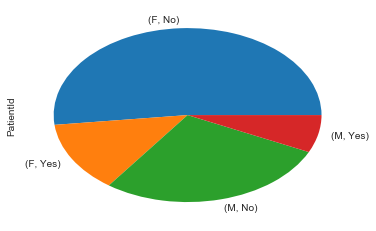

In [16]:
gender_noshow_counts.plot(kind='pie')

In [17]:
df.Age.max()
df.Age.min()
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
df.query('Age>100')
#115岁的老人共5人，其中4人来自同样地区，且两个在同时预约，可信度不高。

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [19]:
#删除小于0岁和大于等于115岁的病人数据
df=df[(df.Age>=0)&(df.Age<115)]

In [20]:
df['Handcap'].value_counts()
# 残障程度有5种类型、介于文档没有相关数据描述，本次分析将0视为无残疾，1-4为残疾。为方便后面的数据分析，将2-4修改为1.
df['Handcap'].replace({2:1,3:1,4:1},inplace=True)
df['Handcap'].value_counts()

0    108284
1      2237
Name: Handcap, dtype: int64

### Research Question 2  (Replace this header name!)

In [63]:
def category(item, value1,value2):
    noshow_counts=df.groupby([item,'NoShow']).count()['PatientId']
    all_counts=df.groupby(item).count()['PatientId']
    cat1=noshow_counts[value1]/all_counts[value1]
    cat2=noshow_counts[value2]/all_counts[value2]
    return cat1[1],cat2[1]

In [65]:
category('Gender','F','M')

(0.2031210847231116, 0.19967947889471915)

In [66]:
category('Scholarship',1,0)

(0.2373630420771568, 0.19805338149709012)

In [67]:
category('Hipertension',1,0)

(0.1730275229357798, 0.20901477665941548)

In [90]:
category('Handcap',1,0)[0]

0.18059901654000893

In [69]:
category('SMS_received',1,0)

(0.27575322003325725, 0.1670042643923241)

In [70]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [72]:
category('Alcoholism',1,0)

(0.20148809523809524, 0.20192980655275708)

In [88]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df.NoShow == 'No')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

#sns.barplot(data = probStatusCategorical(['Diabetes',  'Scholarship']),
           # x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')sns.plt.title('Probability of showing up')
#sns.plt.ylabel('Probability')
#sns.plt.show()

probStatusCategorical(['Diabetes',  'Scholarship'])

,Condition,Level,Probability
0,Diabetes,0,0.796389
1,Diabetes,1,0.819967
2,Scholarship,0,0.801947
3,Scholarship,1,0.762637


In [74]:


sns.barplot(data = category(['Diabetes', 'Alchoholism', 'Hypertension',
                                         'SMS_received', 'Handcap', 'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

TypeError: category() missing 2 required positional arguments: 'value1' and 'value2'

In [50]:
category('Alcoholism',1,0)

(NoShow
 No     0.798512
 Yes    0.201488
 Name: PatientId, dtype: float64, NoShow
 No     0.79807
 Yes    0.20193
 Name: PatientId, dtype: float64)

In [99]:

df['duration']=df.AppointmentDay.dt.date-df.ScheduledDay.dt.date
df['duration'].astype(str)

0          0 days 00:00:00.000000000
1          0 days 00:00:00.000000000
2          0 days 00:00:00.000000000
3          0 days 00:00:00.000000000
4          0 days 00:00:00.000000000
5          2 days 00:00:00.000000000
6          2 days 00:00:00.000000000
7          2 days 00:00:00.000000000
8          0 days 00:00:00.000000000
9          2 days 00:00:00.000000000
10         2 days 00:00:00.000000000
11         3 days 00:00:00.000000000
12         1 days 00:00:00.000000000
13         1 days 00:00:00.000000000
14         1 days 00:00:00.000000000
15         3 days 00:00:00.000000000
16         1 days 00:00:00.000000000
17         1 days 00:00:00.000000000
18         3 days 00:00:00.000000000
19         0 days 00:00:00.000000000
20         2 days 00:00:00.000000000
21         2 days 00:00:00.000000000
22         4 days 00:00:00.000000000
23         1 days 00:00:00.000000000
24         0 days 00:00:00.000000000
25         3 days 00:00:00.000000000
26         0 days 00:00:00.000000000
2

In [102]:
df['duration']=df['duration'].dt.days

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110521 non-null int64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hypertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handicap          110521 non-null int64
SMSReceived       110521 non-null int64
NoShow            110521 non-null object
duration          110521 non-null int64
dtypes: datetime64[ns](2), int64(10), object(3)
memory usage: 18.5+ MB


In [104]:
df[df['duration']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,duration
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [105]:
df=df[df['duration']>=0]

In [93]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

In [112]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,duration
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [108]:
df['duration'].max()

179

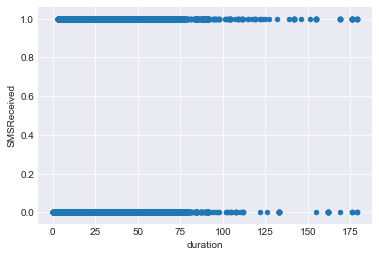

In [113]:
df.plot(x='duration',y='SMSReceived',kind='scatter')

In [114]:
#取出noshow的人员列表
df_noshow=df[df['NoShow']=='Yes']
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,duration
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
11,7542951368435,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3
17,14794966191172,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1
20,622257462899397,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2


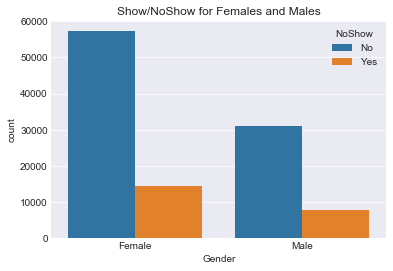

In [117]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

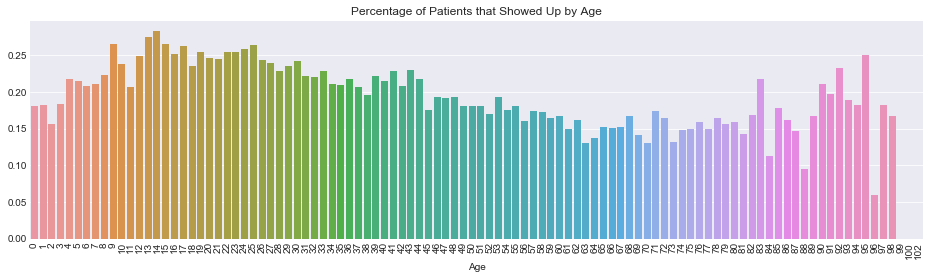

In [120]:
df_age_ratio = df[df.NoShow == 'Yes'].groupby(['Age']).size()/df.groupby(['Age']).size()
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

In [123]:
df[df.NoShow == 'Yes'].groupby(['Age']).size()

Age
0     639
1     415
2     252
3     277
4     282
5     320
6     316
7     300
8     318
9     364
10    304
11    247
12    272
13    303
14    316
15    322
16    353
17    396
18    350
19    393
20    355
21    355
22    350
23    343
24    321
25    352
26    312
27    329
28    332
29    330
     ... 
69    118
70     94
71    121
72    101
73     96
74     89
75     81
76     91
77     79
78     89
79     61
80     81
81     62
82     66
83     61
84     35
85     49
86     42
87     27
88     12
89     29
90     23
91     13
92     20
93     10
94      6
95      6
96      1
97      2
98      1
Length: 99, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!